In [1]:
from typing import List, Tuple, Set

import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
class Cell():
    def __init__(self, i : int, j : int, grid_size : int) -> None:
        self.location : Tuple[int] = (i, j)
        self.grid_size : int = grid_size

        self.spin : int = 0

    def nearest_neighbour_indicies(self, periodic : bool = True) -> Set[Tuple]:
        if periodic:
            left  = ((self.location[0]-1) % self.grid_size, self.location[1])
            right = ((self.location[0]+1) % self.grid_size, self.location[1])
            bot   = (self.location[0], (self.location[1]-1) % self.grid_size)
            top   = (self.location[0], (self.location[1]+1) % self.grid_size)

            return {left, right, bot, top}
        
    def __repr__(self) -> str:
        return (f"Cell {self.location}")


In [3]:
class Grid():
    def __init__(self, size : int, coupling = 0) -> None:
        self.size : int = size
        self.coupling = coupling

        self.cells : List[List[Cell]] = []

    def setup_cells(self) -> None:
        for i in range(self.size):
            self.cells.append([])
            for j in range(self.size):
                self.cells[i].append(Cell(i, j, self.size))

    def reinitialise_cells(self) -> None:
        for row in self.cells:
            for cell in row:
                cell.spin = 0
    
    def randomise_cells(self) -> None:
        for row in self.cells:
            for cell in row:
                cell.spin = np.random.randint(0,2)

    def cell_neighbours(self, cell: Cell):
        neighbour_indicies = cell.nearest_neighbour_indicies()
        neighbour_cells = set()
        for n_idx in neighbour_indicies:
            neighbour_cells.add(self.cells[n_idx[0]][n_idx[1]])
        return neighbour_cells

    def _random_cell(self) -> Cell:
        """Give random cell"""
        return self.cells[np.random.randint(0, self.size)][np.random.randint(0, self.size)]
    
    def time_step(self) -> None:
        cell = self._random_cell()
        neighbours = self.cell_neighbours(cell)
        # align to neighbours
        total_neighbour_spin = np.sum([n.spin for n in neighbours])
        if total_neighbour_spin < 2:
            cell.spin = 0
        elif total_neighbour_spin > 2:
            cell.spin = 1


In [4]:
class Display():
    def __init__(self, grid: Grid) -> None:
        self.grid: Grid = grid
        self.fig, self.ax = plt.subplots()
        self.ax.imshow(np.zeros((self.grid.size, self.grid.size)), 'gray')

    def show(self):
        # get spin values
        spins = []
        for row in self.grid.cells:
            spins.append([cell.spin for cell in row])
        self.ax.imshow(spins, 'gray')
        plt.show()

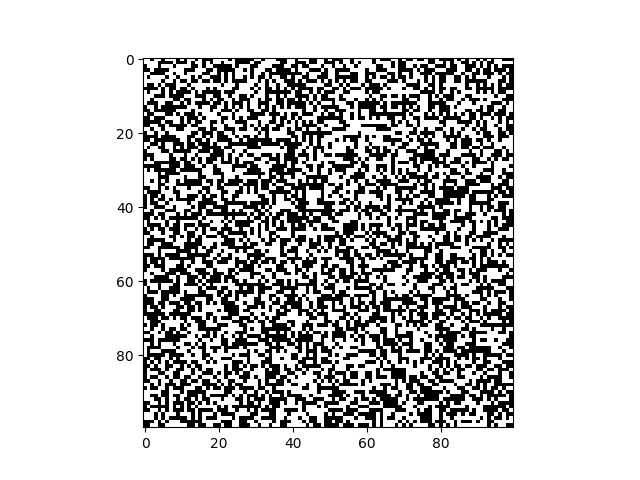

In [11]:
grid = Grid(100)
grid.setup_cells()
grid.randomise_cells()
display = Display(grid)
display.show()

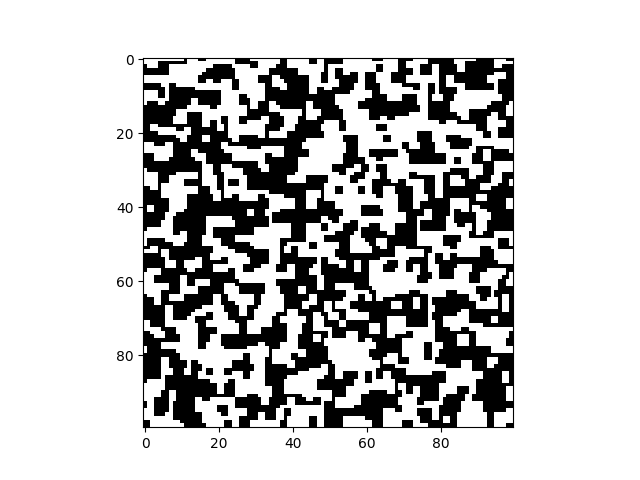

In [12]:
for _ in range (10**5):
    grid.time_step()

display.show()